In [1]:
# This line allows plotting directly in the notebook
%matplotlib inline

# Python scientific package
import numpy as np

from nilearn import datasets
from nilearn import plotting

In [6]:
# We specify the site and number of subjects we want to download
abide = datasets.fetch_abide_pcp(derivatives=['func_preproc'],
                        SITE_ID=['NYU'],
                        n_subjects=3)

In [7]:
# make list of filenames
fmri_filenames = abide.func_preproc

# load atlas
multiscale = datasets.fetch_atlas_basc_multiscale_2015()

In [14]:
atlas_filename = multiscale.scale064

In [15]:
atlas_filename

'/Users/htamvada/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale064.nii.gz'

In [8]:
networks_64 = multiscale['scale064']

In [17]:
from nilearn.input_data import NiftiLabelsMasker
masker = NiftiLabelsMasker(labels_img=atlas_filename,
                               standardize=True,
                               memory='nilearn_cache',
                               verbose=0)

In [9]:
fmri_filenames

['/Users/htamvada/nilearn_data/ABIDE_pcp/cpac/nofilt_noglobal/NYU_0050952_func_preproc.nii.gz',
 '/Users/htamvada/nilearn_data/ABIDE_pcp/cpac/nofilt_noglobal/NYU_0050954_func_preproc.nii.gz',
 '/Users/htamvada/nilearn_data/ABIDE_pcp/cpac/nofilt_noglobal/NYU_0050955_func_preproc.nii.gz']

In [25]:
import pandas as pd
abide_pheno = pd.DataFrame(abide.phenotypic)
dx_group = abide_pheno['DX_GROUP']
file_id = abide_pheno['FILE_ID']

In [24]:
abide_pheno

,i,Unnamed_0,SUB_ID,X,subject,SITE_ID,FILE_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,...,qc_notes_rater_1,qc_anat_rater_2,qc_anat_notes_rater_2,qc_func_rater_2,qc_func_notes_rater_2,qc_anat_rater_3,qc_anat_notes_rater_3,qc_func_rater_3,qc_func_notes_rater_3,SUB_IN_SMP
0,643,644,50952,644,50952,b'NYU',b'NYU_0050952',1,1,8.74,...,b'',b'OK',b'',b'OK',b'',b'OK',b'',b'OK',b'',0
1,645,646,50954,646,50954,b'NYU',b'NYU_0050954',1,1,14.75,...,b'',b'OK',b'',b'OK',b'',b'OK',b'',b'OK',b'',0
2,646,647,50955,647,50955,b'NYU',b'NYU_0050955',1,1,12.64,...,b'',b'OK',b'',b'OK',b'',b'OK',b'',b'OK',b'',0


In [26]:
dx_group

0    1
1    1
2    1
Name: DX_GROUP, dtype: int64

In [27]:
file_id

0    b'NYU_0050952'
1    b'NYU_0050954'
2    b'NYU_0050955'
Name: FILE_ID, dtype: object

In [28]:
for i,sub in enumerate(fmri_filenames):
    # extract the timeseries from the ROIs in the atlas
    time_series = masker.fit_transform(sub)
    dx_group = abide_pheno['DX_GROUP'][i]
    file_id = abide_pheno['FILE_ID'][i]
    print(i, sub, dx_group, file_id)

0 /Users/htamvada/nilearn_data/ABIDE_pcp/cpac/nofilt_noglobal/NYU_0050952_func_preproc.nii.gz 1 b'NYU_0050952'
1 /Users/htamvada/nilearn_data/ABIDE_pcp/cpac/nofilt_noglobal/NYU_0050954_func_preproc.nii.gz 1 b'NYU_0050954'
2 /Users/htamvada/nilearn_data/ABIDE_pcp/cpac/nofilt_noglobal/NYU_0050955_func_preproc.nii.gz 1 b'NYU_0050955'


In [20]:
time_series_tmp = masker.fit_transform(fmri_filenames[0])

In [21]:
time_series_tmp

array([[-0.58203209, -0.81307455, -0.02622164, ..., -0.8474225 ,
        -1.20306258, -0.87869499],
       [-0.71292302, -0.65213125, -0.15985603, ...,  0.88756832,
         0.53820956,  0.52771991],
       [ 0.01928614,  0.25331518,  0.48188819, ...,  0.08542901,
         0.96847003,  0.30205947],
       ...,
       [-0.86653645, -0.69904775,  0.16388542, ..., -0.4304955 ,
        -0.80675684, -1.00037332],
       [-0.9387295 , -1.39512376, -1.74003048, ..., -1.86929745,
        -0.37412736, -2.64054576],
       [ 0.13420583, -0.1304135 ,  0.85864155, ..., -0.0042526 ,
         0.30492236, -0.8100021 ]])

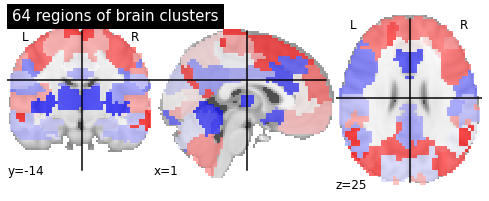

In [15]:
# The coordinates of all plots are selected automatically by itself
# We manually change the colormap of our choice
plotting.plot_roi(networks_64, cmap=plotting.cm.bwr,
                  title='64 regions of brain clusters')

In [7]:
networks_64

'/Users/htamvada/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale064.nii.gz'

In [8]:
s64 = datasets.fetch_atlas_basc_multiscale_2015().scale064

In [9]:
s64

'/Users/htamvada/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale064.nii.gz'

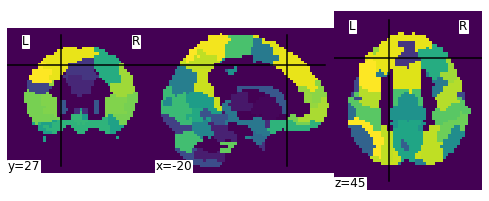

In [11]:
plotting.plot_img(networks_64)